In [1]:
from os import path
import bz2
import pandas as pd 
import numpy as np

sample data published by NewYork Taxi

In [2]:
fname = '~/Downloads/data/taxi.csv'

In [7]:
df = pd.read_csv(fname, usecols=np.arange(21))
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992241,40.690121,-73.999664,40.684994,2,...,4.5,0.0,0.5,0.00,0.0,NaN,0.3,5.30,2,1
1,2,2015-03-22 17:36:49,2015-03-22 17:45:39,N,5,-73.930038,40.819576,-73.907173,40.811306,2,...,12.0,0.0,0.0,0.00,0.0,NaN,0.0,12.00,2,2
2,2,2015-03-25 22:08:45,2015-03-25 22:53:29,N,1,-73.961082,40.807022,-73.984642,40.663147,1,...,45.0,0.5,0.5,9.26,0.0,NaN,0.3,55.56,1,1
3,2,2015-03-16 13:45:20,2015-03-16 13:52:04,N,1,-73.913200,40.777962,-73.926994,40.772743,2,...,6.5,0.0,0.5,0.00,0.0,NaN,0.3,7.30,2,1
4,2,2015-03-19 18:53:50,2015-03-19 18:59:04,N,1,-73.925888,40.827602,-73.916351,40.824966,1,...,5.5,1.0,0.5,0.00,0.0,NaN,0.3,7.30,2,1


In [8]:
len(df)

100000

In [9]:
df.iloc[0]

VendorID                                   2
lpep_pickup_datetime     2015-03-04 15:39:16
Lpep_dropoff_datetime    2015-03-04 15:42:30
Store_and_fwd_flag                         N
RateCodeID                                 1
Pickup_longitude                    -73.9922
Pickup_latitude                      40.6901
Dropoff_longitude                   -73.9997
Dropoff_latitude                      40.685
Passenger_count                            2
Trip_distance                           0.71
Fare_amount                              4.5
Extra                                      0
MTA_tax                                  0.5
Tip_amount                                 0
Tolls_amount                               0
Ehail_fee                                NaN
improvement_surcharge                    0.3
Total_amount                             5.3
Payment_type                               2
Trip_type                                  1
Name: 0, dtype: object

read first 21 columns

In [10]:
df.dtypes


VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                  int64
dtype: object

In [40]:
df = pd.read_csv(fname, usecols=np.arange(21), parse_dates=['lpep_pickup_datetime','Lpep_dropoff_datetime'])

In [41]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

Vendor is either 1 for Creative Mobile or 2 for VeriFone Inc

In [42]:
df['VendorID'].unique()

array([2, 1])

In [43]:
df['Vendor'] = df['VendorID'].apply({1: 'Creative', 2: 'VeriFone'}.get)

In [44]:
df['Vendor'].head()

0    VeriFone
1    VeriFone
2    VeriFone
3    VeriFone
4    VeriFone
Name: Vendor, dtype: object

###### Alter data to categorical

In [45]:
df['Vendor'] = df['VendorID'].apply({1: 'Creative', 2: 'VeriFone'}.get).astype('category')


In [46]:
df['Vendor'].head().cat.codes

0    1
1    1
2    1
3    1
4    1
dtype: int8

In [47]:
len(df[df['Vendor']=='VeriFone'])

77946

Group rides by the hour

In [48]:
df['lpep_pickup_datetime'].head().dt.round('H')

0   2015-03-04 16:00:00
1   2015-03-22 18:00:00
2   2015-03-25 22:00:00
3   2015-03-16 14:00:00
4   2015-03-19 19:00:00
Name: lpep_pickup_datetime, dtype: datetime64[ns]

In [52]:
keys = df['lpep_pickup_datetime'].dt.round('H')

df.groupby(keys)

In [53]:
df.groupby(keys).count().head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,Vendor
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2015-03-01 00:00:00,153,153,153,153,153,153,153,153,153,153,...,153,153,153,153,0,153,153,153,153,153
2015-03-01 01:00:00,266,266,266,266,266,266,266,266,266,266,...,266,266,266,266,0,266,266,266,266,266
2015-03-01 02:00:00,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,0,241,241,241,241,241
2015-03-01 03:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,0,180,180,180,180,180
2015-03-01 04:00:00,172,172,172,172,172,172,172,172,172,172,...,172,172,172,172,0,172,172,172,172,172


In [56]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] =(12, 8)

###### Plot rides based on Vendor

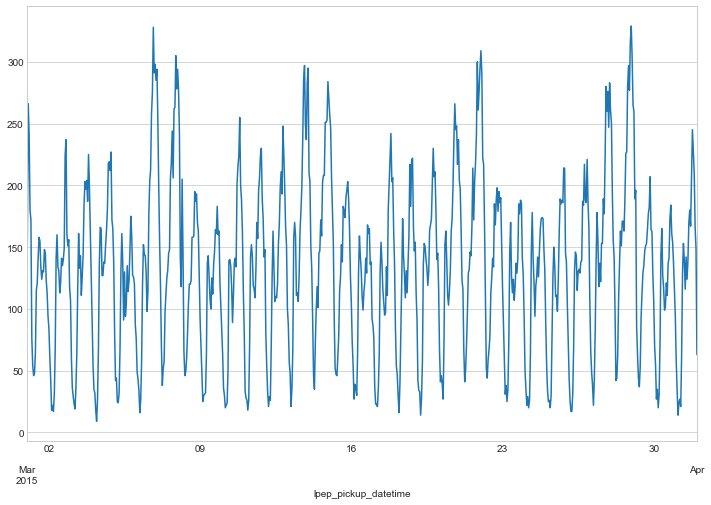

In [60]:
df.groupby(keys).count()['Vendor'].plot()

###### plot a single day's rides

#### Rides Per Hour

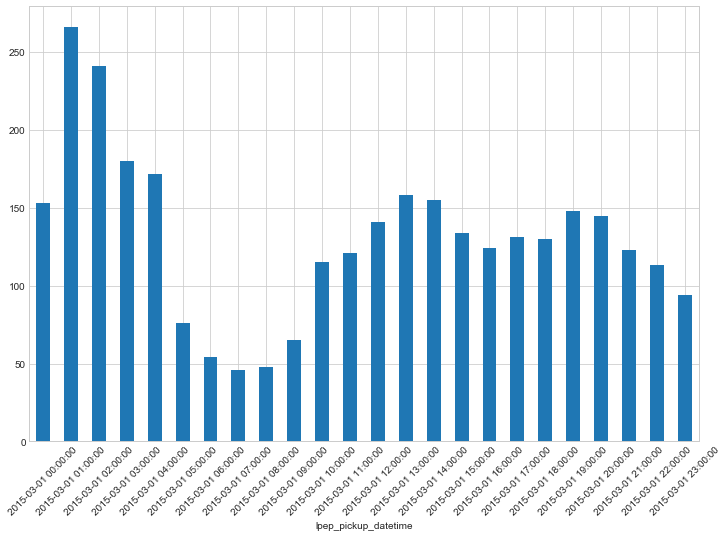

In [62]:
df.groupby(keys).count()['Vendor'].loc['2015-03-01'].plot.bar(rot=45)

create auxiliary columns 

In [64]:
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df['day'] = df['lpep_pickup_datetime'].dt.date

In [66]:
df[['hour', 'day']].head()

,hour,day
0,15,2015-03-04
1,17,2015-03-22
2,22,2015-03-25
3,13,2015-03-16
4,18,2015-03-19



Group by Vendor, Day and Hour


In [68]:
df.groupby(['Vendor', 'day', 'hour']).count().head()

VendorID  lpep_pickup_datetime  \
Vendor   day        hour                                   
Creative 2015-03-01 0         60.0                  60.0   
                    1         60.0                  60.0   
                    2         51.0                  51.0   
                    3         41.0                  41.0   
                    4         28.0                  28.0   

                          Lpep_dropoff_datetime  Store_and_fwd_flag  \
Vendor   day        hour                                              
Creative 2015-03-01 0                      60.0                60.0   
                    1                      60.0                60.0   
                    2                      51.0                51.0   
                    3                      41.0                41.0   
                    4                      28.0                28.0   

                          RateCodeID  Pickup_longitude  Pickup_latitude  \
Vendor   day        hour                                                  
Creative 2015-03-01 0           60.0              60.0             60.0   
                    1           60.0              60.0             60.0   
                    2           51.0              51.0             51.0   
                    3           41.0              41.0             41.0   
                    4           28.0              28.0             28.0   

                          Dropoff_longitude  Dropoff_latitude  \
Vendor   day        hour                                        
Creative 2015-03-01 0                  60.0              60.0   
                    1                  60.0              60.0   
                    2                  51.0              51.0   
                    3                  41.0              41.0   
                    4                  28.0              28.0   

                          Passenger_count     ...      Fare_amount  Extra  \
Vendor   day        hour                      ...                           
Creative 2015-03-01 0                60.0     ...             60.0   60.0   
                    1                60.0     ...             60.0   60.0   
                    2                51.0     ...             51.0   51.0   
                    3                41.0     ...             41.0   41.0   
                    4                28.0     ...             28.0   28.0   

                          MTA_tax  Tip_amount  Tolls_amount  Ehail_fee  \
Vendor   day        hour                                                 
Creative 2015-03-01 0        60.0        60.0          60.0        0.0   
                    1        60.0        60.0          60.0        0.0   
                    2        51.0        51.0          51.0        0.0   
                    3        41.0        41.0          41.0        0.0   
                    4        28.0        28.0          28.0        0.0   

                          improvement_surcharge  Total_amount  Payment_type  \
Vendor   day        hour                                                      
Creative 2015-03-01 0                      60.0          60.0          60.0   
                    1                      60.0          60.0          60.0   
                    2                      51.0          51.0          51.0   
                    3                      41.0          41.0          41.0   
                    4                      28.0          28.0          28.0   

                          Trip_type   
Vendor   day        hour              
Creative 2015-03-01 0           60.0  
                    1           60.0  
                    2           51.0  
                    3           41.0  
                    4           28.0  

[5 rows x 21 columns]

In [72]:
ddf = df.groupby(['Vendor', 'day', 'hour'], as_index=False).count()

ddf.head()

,Vendor,day,hour,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,Creative,2015-03-01,0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,...,60.0,60.0,60.0,60.0,60.0,0.0,60.0,60.0,60.0,60.0
1,Creative,2015-03-01,1,60.0,60.0,60.0,60.0,60.0,60.0,60.0,...,60.0,60.0,60.0,60.0,60.0,0.0,60.0,60.0,60.0,60.0
2,Creative,2015-03-01,2,51.0,51.0,51.0,51.0,51.0,51.0,51.0,...,51.0,51.0,51.0,51.0,51.0,0.0,51.0,51.0,51.0,51.0
3,Creative,2015-03-01,3,41.0,41.0,41.0,41.0,41.0,41.0,41.0,...,41.0,41.0,41.0,41.0,41.0,0.0,41.0,41.0,41.0,41.0
4,Creative,2015-03-01,4,28.0,28.0,28.0,28.0,28.0,28.0,28.0,...,28.0,28.0,28.0,28.0,28.0,0.0,28.0,28.0,28.0,28.0


###### group by the hour and calculate the media
.

In [76]:
hdf = ddf.groupby(['Vendor', 'hour'], as_index=False).median()

hdf.head()

,Vendor,hour,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,Creative,0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,...,23.0,23.0,23.0,23.0,23.0,0.0,23.0,23.0,23.0,23.0
1,Creative,1,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,...,18.0,18.0,18.0,18.0,18.0,0.0,18.0,18.0,18.0,18.0
2,Creative,2,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,...,11.5,11.5,11.5,11.5,11.5,0.0,11.5,11.5,11.5,11.5
3,Creative,3,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,8.0,8.0,0.0,8.0,8.0,8.0,8.0
4,Creative,4,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0


###### Work with pivot 

use :  hour -> Index,
       Vendor  -> Column, 
       Median -> Value.

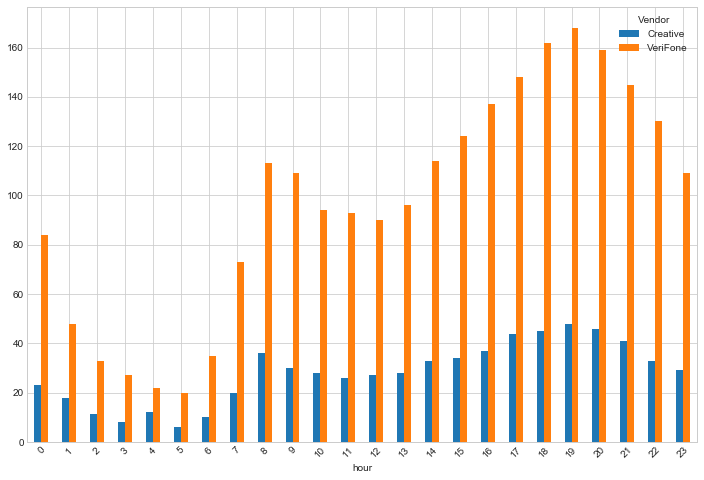

In [79]:
vdf = hdf.pivot(columns='Vendor', index='hour', values='Extra')

vdf.plot.bar(rot=45)